In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import IsolationForest

%matplotlib inline

In [3]:
conn = pyodbc.connect(r"driver={SQL SERVER};server=LAPTOP-V88UBQAA\SQLSERVERVINCENT;database=AdventureWorks2016;trusted_connection=YES;")
conx_string = "driver={SQL SERVER};server=LAPTOP-V88UBQAA\SQLSERVERVINCENT;database=AdventureWorks2016;trusted_connection=YES;"
query2 = "SELECT TOP (1000) [PRS_START_TIME],[PRS_END_TIME],[PRS_STATE],[PRS_BUSINESS_KEY],try_convert(float, RIGHT(PRS_Business_key, len(PRS_BUSINESS_KEY) - charindex(':', prs_business_key))) as Business_Key, try_convert(float, DATEDIFF(MILLISECOND, PRS_START_TIME,PRS_END_TIME)) as Process_Time FROM [ORCHESTRA].[dbo].[ORC_PROCESS_STATE];"
SQLquery = pd.read_sql_query(query2, conn)
conx = pyodbc.connect(conx_string);
cursor = conx.cursor();
cursor.execute(query2);
data = cursor.fetchall()
df = pd.DataFrame(SQLquery, columns=['PRS_STATE','Business_Key', 'Process_Time'])
df = df.drop(31, axis=0)

In [4]:
y = df['PRS_STATE']
X = df[['Business_Key', 'Process_Time']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [7]:
from sklearn.svm import SVC

In [8]:
model = SVC()

In [9]:
model.fit(X_train,y_train)

SVC()

In [10]:
predictions = model.predict(X_test)
predictions

array([9., 3., 9., 9., 3., 9., 9., 9., 9., 3., 3., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 3., 3., 3., 9., 9., 3., 3., 9., 9., 9., 3., 3., 9., 3.,
       9., 3., 9., 3., 9., 9., 3., 9., 9., 9., 9., 3., 3., 9., 9., 9., 9.,
       9., 9., 3., 3., 3., 3., 9., 9., 9., 3., 3., 3., 3., 3.])

In [11]:
print(confusion_matrix(y_test,predictions))

[[26 17]
 [ 0 22]]


In [12]:
print(classification_report(y_test,predictions, labels=np.unique(predictions)))

              precision    recall  f1-score   support

         3.0       1.00      0.60      0.75        43
         9.0       0.56      1.00      0.72        22

    accuracy                           0.74        65
   macro avg       0.78      0.80      0.74        65
weighted avg       0.85      0.74      0.74        65



In [13]:
#Improve parameters C and gamma with sklearn GridSearchCV function to improce accuracy
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [16]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.712, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.712, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.706, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.706, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.706, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.712, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.981, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.981, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.961, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.980, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[CV] .......... C=100, gamma=1, kernel=rbf, score=0.941, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.922, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.981, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.981, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.980, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [17]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [18]:
grid_predictions = grid.predict(X_test)

In [19]:
print(confusion_matrix(y_test,grid_predictions))

[[42  1]
 [ 0 22]]


In [25]:
print(classification_report(y_test,grid_predictions, labels=np.unique(predictions)))

              precision    recall  f1-score   support

         3.0       1.00      0.98      0.99        43
         9.0       0.96      1.00      0.98        22

    accuracy                           0.98        65
   macro avg       0.98      0.99      0.98        65
weighted avg       0.99      0.98      0.98        65



In [20]:
y_all = grid.predict(X)

df['pred'] = y_all

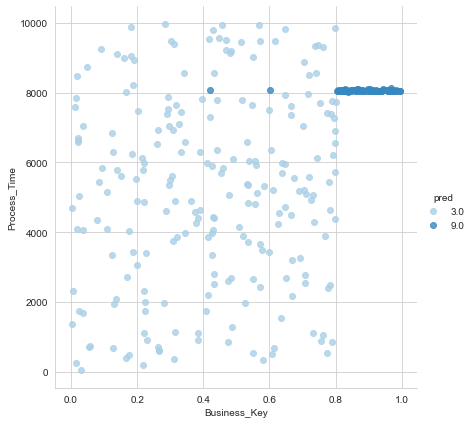

In [23]:
#Visualize prediction results with hue='pred'
sns.set_style('whitegrid')
sns.lmplot('Business_Key','Process_Time',data=df, hue='pred',
           palette='Blues',height=6,aspect=1,fit_reg=False)

In [27]:
!pip install mlxtend

  Using cached mlxtend-0.18.0-py2.py3-none-any.whl (1.3 MB)


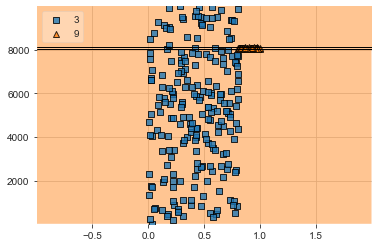

In [33]:
#Visualize the vectors generated by the algorithm to isolate the outlier data
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

svm = SVC(C=1, gamma=0.01, kernel='rbf')
svm.fit(X, y)
plot_decision_regions(X.values, (y.values).astype(np.integer), clf=svm, legend=2)
plt.show()